## Harris corner detection algorithm


I used sobel kernel to find the gradient of pixels, then applied harris algorithm using  window size=3

نورهان محمد صالح يوسف    
  Nourhan_195@hotmail.com
                 
  43913   
  BN: 1401600

In [37]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA

In [122]:
def full_padding(img):
    vertical=np.zeros((img.shape[0],1))
    horizontal=np.zeros((1,img.shape[1]+2))
    left_concat=np.concatenate((vertical,img),axis=1)
    right_concat=np.concatenate((left_concat,vertical),axis=1)
    upper_concat=np.concatenate((horizontal,right_concat),axis=0)
    bottom_concat=np.concatenate((upper_concat,horizontal),axis=0)
    return bottom_concat

In [123]:
def sobel_gradient(padded_img):
    
    Gx=np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    Gy=np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    Ix=np.zeros((padded_img.shape[0]-2,padded_img.shape[1]-2)) ; Iy=np.zeros((padded_img.shape[0]-2,padded_img.shape[1]-2))
    for row in range(1,padded_img.shape[0]-1):
        for column in range(1,padded_img.shape[1]-1):
            Gxpre_ypre=padded_img[row-1][column-1]
            Gx_ypre=padded_img[row][column-1]
            Gxpost_ypre=padded_img[row+1][column-1]

            Gxpre_ypost=padded_img[row-1][column+1]
            Gx_ypost=padded_img[row][column+1]
            Gxpost_ypost=padded_img[row+1][column+1]

            Gxpre_y=padded_img[row-1][column]
            Gxpost_y=padded_img[row+1][column]
            Ix[row-1][column-1]=(Gx[0][0]*Gxpre_ypre+Gx[1][0]*Gx_ypre+Gx[2][0]*Gxpost_ypre+Gx[0][2]*Gxpre_ypost+Gx[1][2]*Gx_ypost+Gx[2][2]*Gxpost_ypost)
            Iy[row-1][column-1]=(Gy[0][0]*Gxpre_ypre+Gy[0][1]*Gxpre_y+Gy[2][0]*Gxpost_ypre+Gy[0][2]*Gxpre_ypost+Gy[2][1]*Gxpost_y+Gy[2][2]*Gxpost_ypost)
            
    return(Ix,Iy)
        
    

In [124]:
def getCorners(img,window_size,threshold=28660188363):
    color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    offset=int(window_size/2)
    cornerList=[]
    for row in range(offset,img.shape[0]-offset): 
        for column in range(offset,img.shape[1]-offset): 
            windowIxx = Ixx[row-offset:row+offset+1, column-offset:column+offset+1]
            windowIxy = Ixy[row-offset:row+offset+1, column-offset:column+offset+1]
            windowIyy = Iyy[row-offset:row+offset+1, column-offset:column+offset+1]
            Sxx = windowIxx.sum()
            Sxy = windowIxy.sum()
            Syy = windowIyy.sum()
            M=np.array([[Sxx,Sxy],[Sxy,Syy]])
            eigen_values, eigen_vectors = LA.eig(M)
            det=eigen_values[0]*eigen_values[1]
            trace=eigen_values[0]+eigen_values[1]
            R=det-(0.06*trace*trace)
            if R>threshold:
                cornerList.append([row,column,R])
                color_img.itemset((row, column, 0), 0)
                color_img.itemset((row, column, 1), 0)
                color_img.itemset((row, column, 2), 255)
    return(color_img,cornerList)




## using sobel to find gradient

In [125]:
img=cv2.imread('images/corner.jpg',0)
padded_img_1=full_padding(img)
#sobel gradient for each pixel
Ix,Iy=sobel_gradient(padded_img_1) 

## Haris  algorithm for corners' detection

In [126]:
Ixx=Ix**2
Iyy=Iy**2
Ixy=Iy*Ix
corners_image,corners_list=getCorners(img,3)

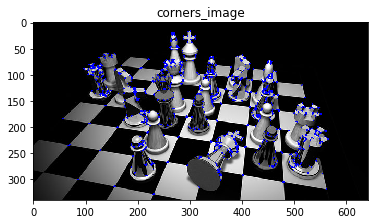

In [127]:

plt.imshow(corners_image)
plt.title('corners_image')
plt.show()

## using CV2 function

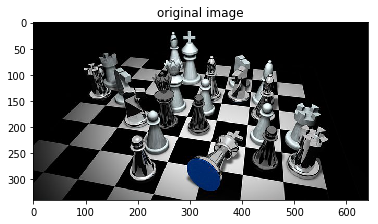

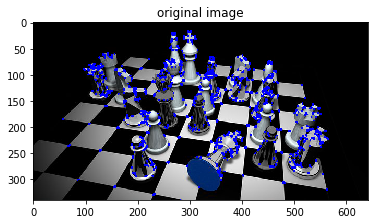

In [13]:
img=cv2.imread('images/corner.jpg')  
plt.imshow(img)
plt.title('original image')
plt.show()
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

plt.imshow(img)
plt.title('original image')
plt.show()
